In [1]:
#points

In [2]:
from volumetricspy.stats import Dot,CloudPoints
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d


In [3]:
p1 = Dot(x=10,y=20,z=1, fields={'phi':0.15})


In [4]:
p1.df()

,x,y,z,crs,phi,geometry
0,10.0,20.0,1.0,None,0.15,POINT (10.00000 20.00000)


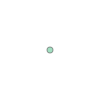

In [5]:
p1.to_shapely()

In [6]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
df

,X,Y,Facies,Porosity,Perm
0,100,900,1,0.115359,5.736104
1,100,800,1,0.136425,17.211462
2,100,600,1,0.135810,43.724752
3,100,500,0,0.094414,1.609942
4,100,100,0,0.113049,10.886001
...,...,...,...,...,...
284,190,199,1,0.109411,3.247265
285,190,419,0,0.099541,1.528003
286,920,379,0,0.094099,2.514597
287,60,149,0,0.100167,3.636854


In [7]:
cp = CloudPoints().from_df(df, x='X',y='Y', fields=['Facies','Porosity','Perm'])
cp.df()

,x,y,z,crs,Facies,Porosity,Perm,geometry
0,100.0,900.0,None,None,1.0,0.115359,5.736104,POINT (100.000 900.000)
0,100.0,800.0,None,None,1.0,0.136425,17.211462,POINT (100.000 800.000)
0,100.0,600.0,None,None,1.0,0.135810,43.724752,POINT (100.000 600.000)
0,100.0,500.0,None,None,0.0,0.094414,1.609942,POINT (100.000 500.000)
0,100.0,100.0,None,None,0.0,0.113049,10.886001,POINT (100.000 100.000)
...,...,...,...,...,...,...,...,...
0,190.0,199.0,None,None,1.0,0.109411,3.247265,POINT (190.000 199.000)
0,190.0,419.0,None,None,0.0,0.099541,1.528003,POINT (190.000 419.000)
0,920.0,379.0,None,None,0.0,0.094099,2.514597,POINT (920.000 379.000)
0,60.0,149.0,None,None,0.0,0.100167,3.636854,POINT (60.000 149.000)


In [8]:
cp.distance_matrix().shape

(289, 289)

<AxesSubplot:xlabel='x', ylabel='y'>

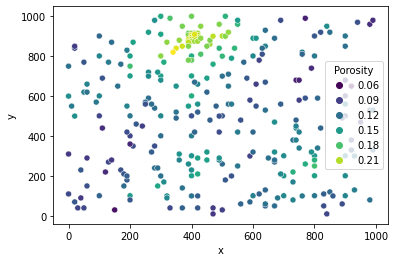

In [11]:
cp.plot(hue='Porosity',palette='viridis')

In [ ]:
cp = cp.poly_declustering()
cp_df = cp.df()
cp_df

In [ ]:
cp_df['weight'].sum()

In [ ]:
np.dot(cp_df['phi'],cp_df['weight'])

In [ ]:
vr = Voronoi(df[['X','Y']].values)
voronoi_plot_2d(vr)

In [ ]:
plt.plot(vr.vertices[vr.regions[2],0],vr.vertices[vr.regions[2],1],'r')

In [ ]:
a1 = np.ones(5)
a2 = np.zeros(5)

np.column_stack((a1,a2))

In [ ]:
vertices = vr.vertices
regions = vr.regions

sev = vertices[regions[7],:]
sev

In [ ]:
sev = np.vstack((sev,sev[0,:]))

In [ ]:
plt.plot(sev[:,0],sev[:,1],'r')

In [ ]:
cp1 = CloudPoints().from_df(df.sample(5), x='X',y='Y',fields=['Porosity','Perm'], crs=3116)
cp1.df()


In [ ]:
df1 = cp1.poly_declustering().df()
df1

In [ ]:
sns.scatterplot(data=df1, x='x',y='y',size='area')

In [ ]:
cp1.plot_veronoi()

In [ ]:
r = Voronoi(df1[['x','y']].values).ridge_points
np.array(r)

In [ ]:
v = Voronoi(df1[['x','y']].values).vertices
v

In [ ]:
v = Voronoi(df1[['x','y']].values).point_region
v

In [ ]:
plt.plot(v[r[],0],v[r[2],1],'r')